In [258]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

In [74]:
#cleaned = pd.read_csv('/Users/jordanlabuda/Documents/GitHub/sosc133/CleanSOSC.csv')
cleaned = pd.read_csv('CleanSOSC.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
cleaned

,Unnamed: 0,gvkey,splticrm,datadate,tic,cusip_x,date,NCUSIP,TICKER,PERMNO,COMNAM,cusip_y,NWPERM,PRC,VOL,RET
0,0,1003,NaN,20100131,ANTQ,0003541,2010-01-31,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1003,NaN,20100228,ANTQ,0003541,2010-02-28,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1003,NaN,20100331,ANTQ,0003541,2010-03-31,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1003,NaN,20100430,ANTQ,0003541,2010-04-30,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1003,NaN,20100531,ANTQ,0003541,2010-05-31,000354100,ANTQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832964,832964,316056,BBB-,20161031,ALLE,G0176J1,2016-10-31,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,71.22,573928.0,-0.000561
832965,832965,316056,BBB-,20161130,ALLE,G0176J1,2016-11-30,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,68.91,1014660.0,0.009522
832966,832966,316056,BBB-,20161231,ALLE,G0176J1,2016-12-31,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,63.84,1601109.0,0.003931
832967,832967,316056,BBB-,20170131,ALLE,G0176J1,2017-01-31,G0176J109,ALLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
cleaned.columns

Index(['Unnamed: 0', 'gvkey', 'splticrm', 'datadate', 'tic', 'cusip_x', 'date',
       'NCUSIP', 'TICKER', 'PERMNO', 'COMNAM', 'cusip_y', 'NWPERM', 'PRC',
       'VOL', 'RET'],
      dtype='object')

Below is correct for what you wanted to do, but its a void method so we need to put cleaned= before it. Lots of pandas methods have a parameter called inplace which allows you to not have to do this.

In [77]:
#idk how to specify if only price is null but seems related so just gonna drop them all
cleaned = cleaned.dropna(subset=['PRC', 'splticrm'])

In [78]:
#binned = cleaned.groupby('splticrm')

In [79]:
#binned.groups

In [80]:
binsdict = {
    'D': 1,
    'SD': 2,
    'RD': 3,
    'C': 4,
    'CC': 5,
    'CCC-': 6,
    'CCC': 7,
    'CCC+': 8,
    'B-': 9,
    'B': 10,
    'B+' : 11,
    'BB-': 12,
    'BB': 13,
    'BB+': 14,
    'BBB-': 15,
    'BBB': 16,
    'BBB+' : 17,
    'A-': 18,
    'A': 19,
    'A+': 20,
    'AA-': 21,
    'AA': 22,
    'AA+': 23,
    'AAA': 24
}


In [81]:
#this is a pretty and generalizable way to apply lambdas to a dataframe
func = lambda x: binsdict[x]
cleaned['num_cr'] = cleaned['splticrm'].apply(func)

<ipython-input-81-f7a6904ae199>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['num_cr'] = cleaned['splticrm'].apply(func)


In [82]:
cleaned

,Unnamed: 0,gvkey,splticrm,datadate,tic,cusip_x,date,NCUSIP,TICKER,PERMNO,COMNAM,cusip_y,NWPERM,PRC,VOL,RET,num_cr
39,39,1004,BB,20100531,AIR,0003611,2010-05-31,000361105,AIR,54594.0,A A R CORP,00036110,NaN,24.82,229900.0,-0.010761,13
40,40,1004,BB,20100630,AIR,0003611,2010-06-30,000361105,AIR,54594.0,A A R CORP,00036110,NaN,24.38,184900.0,-0.034455,13
44,44,1004,BB,20101031,AIR,0003611,2010-10-31,000361105,AIR,54594.0,A A R CORP,00036110,NaN,15.36,278400.0,-0.015385,13
47,47,1004,BB,20110131,AIR,0003611,2011-01-31,000361105,AIR,54594.0,A A R CORP,00036110,NaN,24.56,308200.0,0.0107,13
48,48,1004,BB,20110228,AIR,0003611,2011-02-28,000361105,AIR,54594.0,A A R CORP,00036110,NaN,27.47,257200.0,0.004755,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832958,832958,316056,BB+,20160430,ALLE,G0176J1,2016-04-30,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,63.00,1127875.0,-0.013776,14
832961,832961,316056,BBB-,20160731,ALLE,G0176J1,2016-07-31,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,67.64,563701.0,-0.005148,15
832964,832964,316056,BBB-,20161031,ALLE,G0176J1,2016-10-31,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,71.22,573928.0,-0.000561,15
832965,832965,316056,BBB-,20161130,ALLE,G0176J1,2016-11-30,G0176J109,ALLE,14297.0,ALLEGION PLC,G0176J10,NaN,68.91,1014660.0,0.009522,15


In [101]:
#tics=cleaned.groupby('tic')

In [265]:
#tics['our_ret']=tics['PRC'].Series.GroupBy.apply(pct_change)
cleaned['our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: x.pct_change())
cleaned['log_our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: np.log(x).pct_change())

<ipython-input-265-e5cc2aad3e7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: x.pct_change())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-265-e5cc2aad3e7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['log_our_ret']=cleaned.groupby('tic')['PRC'].apply(lambda x: np.log(x).pct_change())


In [267]:
cleaned = cleaned.dropna(subset=['our_ret','log_our_ret'])

In [268]:
cleaned

,Unnamed: 0,gvkey,splticrm,datadate,tic,cusip_x,date,NCUSIP,TICKER,PERMNO,...,23_index,24_index,5_index,7_index,6_index,1_index,2_index,test_ind,our_ret,log_our_ret
40,40,1004,BB,20100630,AIR,0003611,2010-06-30,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,NaN,-0.017728,-0.005569
44,44,1004,BB,20101031,AIR,0003611,2010-10-31,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,NaN,-0.369975,-0.144656
47,47,1004,BB,20110131,AIR,0003611,2011-01-31,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,NaN,0.598958,0.171813
48,48,1004,BB,20110228,AIR,0003611,2011-02-28,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,NaN,0.118485,0.034980
49,49,1004,BB,20110331,AIR,0003611,2011-03-31,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,NaN,-0.024754,-0.007566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832958,832958,316056,BB+,20160430,ALLE,G0176J1,2016-04-30,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,NaN,-0.062639,-0.015373
832961,832961,316056,BBB-,20160731,ALLE,G0176J1,2016-07-31,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,NaN,0.073651,0.017152
832964,832964,316056,BBB-,20161031,ALLE,G0176J1,2016-10-31,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,NaN,0.052927,0.012238
832965,832965,316056,BBB-,20161130,ALLE,G0176J1,2016-11-30,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,NaN,-0.032435,-0.007730


In [312]:
model=sm.OLS(cleaned['our_ret'], cleaned['num_cr'])
logmodel=sm.OLS(cleaned['log_our_ret'], cleaned['num_cr'])
result=model.fit()
logresult=logmodel.fit()
print(result.summary())
print('\n\n\n\n\n\n')
print(logresult.summary())

                                 OLS Regression Results                                
Dep. Variable:                our_ret   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              30.57
Date:                Wed, 26 May 2021   Prob (F-statistic):                    3.25e-08
Time:                        23:38:42   Log-Likelihood:                         -43327.
No. Observations:               41244   AIC:                                  8.666e+04
Df Residuals:                   41243   BIC:                                  8.666e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [133]:
cleaned

,Unnamed: 0,gvkey,splticrm,datadate,tic,cusip_x,date,NCUSIP,TICKER,PERMNO,...,19_index,21_index,23_index,24_index,5_index,7_index,6_index,1_index,2_index,test_ind
39,39,1004,BB,20100531,AIR,0003611,2010-05-31,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,None,None,NaN
40,40,1004,BB,20100630,AIR,0003611,2010-06-30,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,None,None,NaN
44,44,1004,BB,20101031,AIR,0003611,2010-10-31,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,None,None,NaN
47,47,1004,BB,20110131,AIR,0003611,2011-01-31,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,None,None,NaN
48,48,1004,BB,20110228,AIR,0003611,2011-02-28,000361105,AIR,54594.0,...,None,None,None,None,None,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832958,832958,316056,BB+,20160430,ALLE,G0176J1,2016-04-30,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,None,None,NaN
832961,832961,316056,BBB-,20160731,ALLE,G0176J1,2016-07-31,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,None,None,NaN
832964,832964,316056,BBB-,20161031,ALLE,G0176J1,2016-10-31,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,None,None,NaN
832965,832965,316056,BBB-,20161130,ALLE,G0176J1,2016-11-30,G0176J109,ALLE,14297.0,...,None,None,None,None,None,None,None,None,None,NaN


In [299]:
ind_df = pd.DataFrame(index=cleaned['date'].unique())
diff_df = pd.DataFrame(index=cleaned['date'].unique())

In [300]:
for cr in np.sort(cleaned['num_cr'].unique()):
    ind_df[str(cr)+'_index'] = cleaned[cleaned['num_cr'] == cr].groupby(['date']).apply(lambda x: x[x['num_cr'] == cr]['PRC'].sum())

Lots of sparsity on lower credit ratings.  We reasonably should have expected this but it is annoying nonetheless.  As a result, we are going to plot 24 with 10 for pretty visuals.

In [302]:
ind_df

,1_index,2_index,5_index,6_index,7_index,8_index,9_index,10_index,11_index,12_index,...,15_index,16_index,17_index,18_index,19_index,20_index,21_index,22_index,23_index,24_index
2010-06-30,16.0300,NaN,NaN,2.21,6.0700,109.6000,289.25000,1210.88430,1657.78500,2659.71050,...,5143.76750,7654.14249,4361.05999,3643.44001,3627.90250,2447.38999,1250.57000,947.50999,129.40000,247.9750
2010-10-31,12.6500,NaN,NaN,1.68,2.5600,71.4675,145.65160,894.70050,1417.81250,2106.40490,...,4896.31249,6274.32497,3985.96240,3574.54150,3155.79399,2251.64450,1015.13750,788.66000,120.27000,215.0850
2011-01-31,13.7600,NaN,NaN,NaN,NaN,76.8800,153.41970,1237.67560,1678.84900,2597.52500,...,5545.15011,7279.42246,4909.27000,3888.93000,3630.94510,2410.85951,1266.04000,897.74000,140.76000,237.2575
2011-02-28,13.3700,NaN,NaN,NaN,NaN,88.9700,168.64320,1421.10000,1728.66010,2897.12010,...,5913.36501,7474.03503,5202.27000,3835.31801,4089.75000,1893.06997,1333.04000,969.94000,156.40000,249.6800
2011-03-31,11.9800,NaN,NaN,NaN,NaN,72.7200,213.91000,1536.94000,1713.68500,2729.97500,...,6050.05500,7748.79000,5199.06999,4011.74001,4118.13000,2615.78999,1370.11000,875.68000,151.61000,260.6850
2011-04-30,10.8000,NaN,NaN,NaN,NaN,58.6200,182.55000,1677.07000,1944.50000,2841.28000,...,5816.10500,8168.64999,5449.62000,4208.08000,4240.37499,2710.61990,1476.28000,831.57000,154.13001,275.4900
2011-07-31,17.7700,NaN,NaN,NaN,5.0600,46.8000,235.71000,1371.52160,1888.88500,2584.11000,...,5816.65000,8100.38502,5769.46500,4095.04001,4252.70000,2520.41999,1523.79000,824.26001,170.71001,280.4600
2011-10-31,8.9600,NaN,1.64,NaN,1.9300,29.8800,164.16000,1030.84300,1562.33000,2237.19500,...,5032.05000,7617.37000,4703.16000,4207.12000,3765.69001,2283.17500,1465.99000,681.98500,170.41001,257.4300
2011-11-30,6.4400,NaN,NaN,1.22,3.6000,10.4300,171.38000,877.02240,1393.45500,2109.35500,...,4668.97500,6838.83999,4436.06000,4097.20001,3226.20000,2230.62499,1182.00000,633.72999,164.75999,244.4700
2011-12-31,6.7700,NaN,NaN,1.44,3.5500,17.9600,218.37000,976.35000,1478.04000,2392.73000,...,5246.54500,7806.70001,5032.57750,4655.23997,3391.19000,2374.64999,1352.40000,590.51000,188.02000,262.6600


In [303]:
for col in ind_df.columns:
    diff_df[col] = ind_df[col].apply(lambda x: x-ind_df.iloc[0][col])

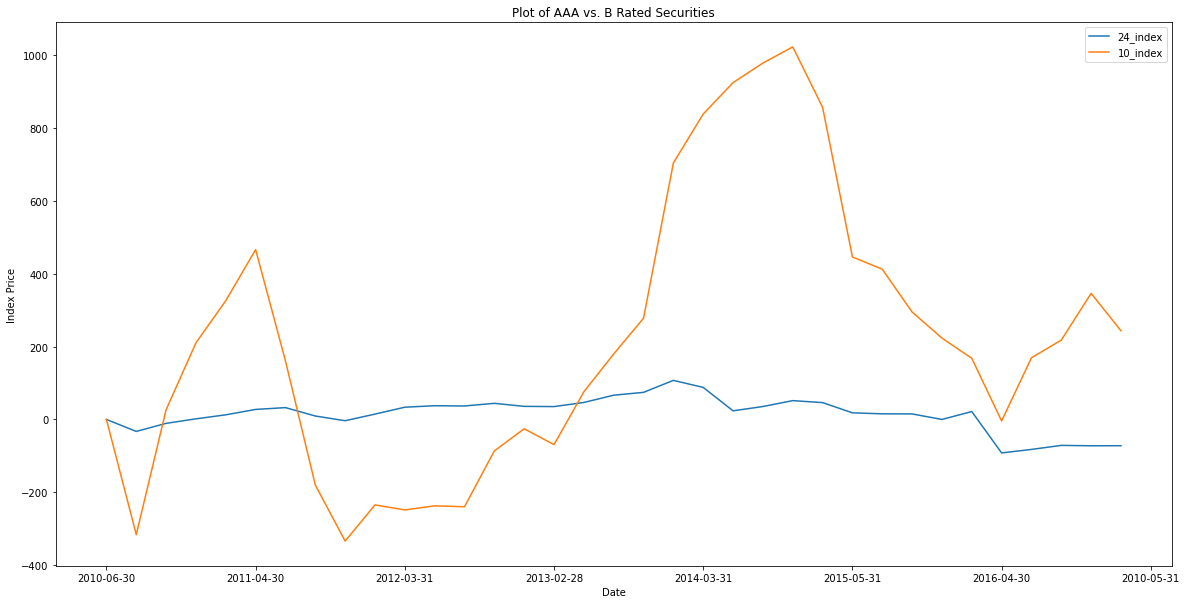

In [334]:
diff_df[['24_index', '10_index']].plot(figsize=(20,10))
plt.title('Plot of AAA vs. B Rated Securities')
plt.ylabel('Index Price')
plt.xlabel('Date')
plt.savefig('LinePlot.png', dpi=500)

By the above plot we see seemingly unintuitive results.  But, considering the intuition of the Sharpe ratio these results make sense from a theoretical standpoint.  Our assumption was that $returns$ of higher credit rated stocks would outperform those of lower credit rated stocks, but this assumption inherently neglects the relative risk of these assets.  As such, we must compare the risk adjusted returns, given to us by the Sharpe ratio, rather than the absolute returns.  We calculate Sharpe for each index below.

In [325]:
sharpe_df = pd.DataFrame(index=range(1,25), columns= ['Sharpe'])

i=0
for col in ind_df.columns:
    num = int(col.split('_')[0])
    sharpe_df['Sharpe'][num] = ret_df[col+'_ret'].mean() / ret_df[col+'_ret'].std()
    i+=1

In [326]:
sharpe_df

,Sharpe
1,0.157682
2,0.424713
3,NaN
4,NaN
5,0.215428
6,0.0915151
7,0.149145
8,0.270401
9,0.0126375
10,0.104216


Consider only 4: since these are well defined.

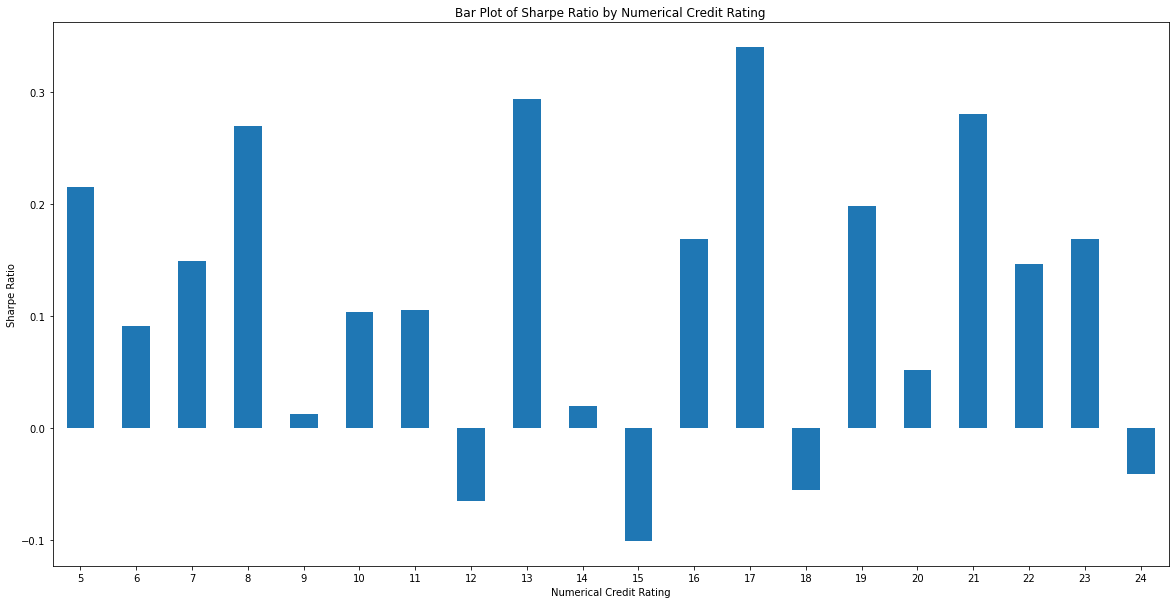

In [335]:
sharpe_df[4:].plot.bar(figsize= (20,10), rot=0, legend=False)
plt.title('Bar Plot of Sharpe Ratio by Numerical Credit Rating')
plt.xlabel('Numerical Credit Rating')
plt.ylabel('Sharpe Ratio')
plt.savefig('SharpeBars.png', dpi=500)

We see similarly bizarre results. 

Now, consider the distribution of returns.

In [308]:
ret_df = pd.DataFrame(index=ind_df.index)
for col in ind_df:
    ret_df[col+'_ret'] = ind_df[col].pct_change(1)

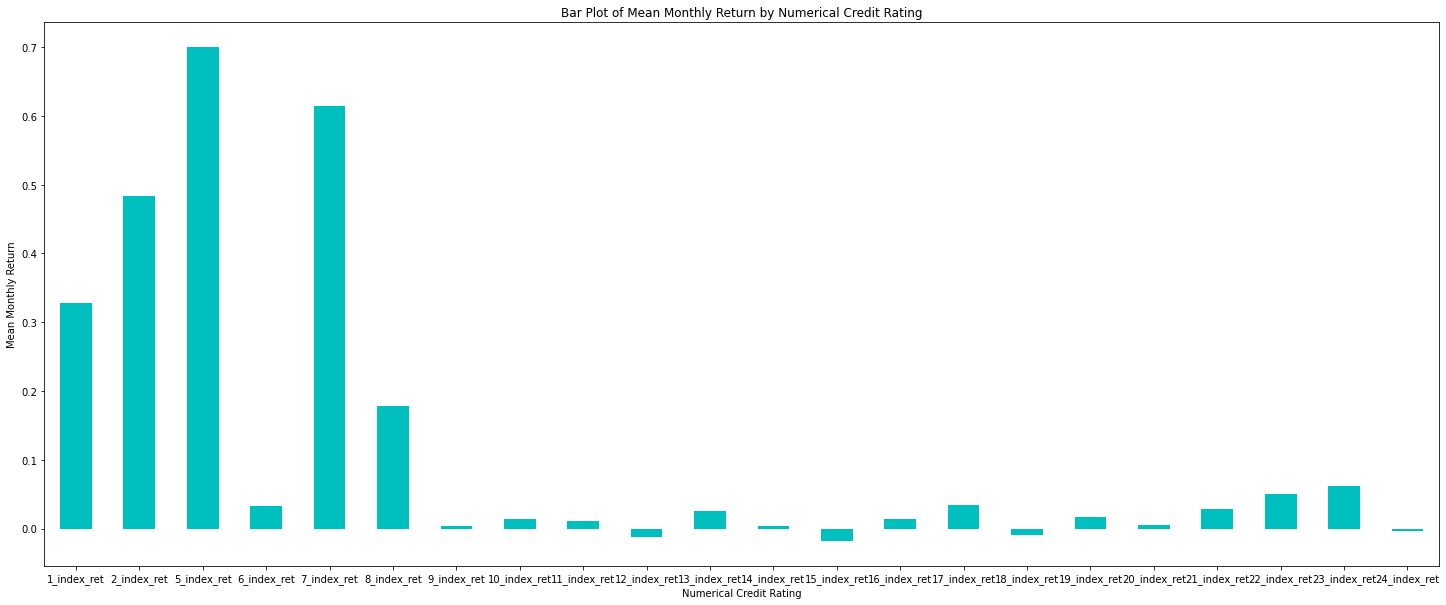

In [337]:
ret_df.mean().plot.bar(figsize= (25,10), rot=0, legend=False, color='c')
plt.title('Bar Plot of Mean Monthly Return by Numerical Credit Rating')
plt.xlabel('Numerical Credit Rating')
plt.ylabel('Mean Monthly Return')
plt.savefig('MeanRetBars.png', dpi=500)

In [283]:
ret_df

,13_index_ret,14_index_ret,10_index_ret,11_index_ret,12_index_ret,15_index_ret,16_index_ret,17_index_ret,18_index_ret,22_index_ret,...,8_index_ret,19_index_ret,21_index_ret,23_index_ret,24_index_ret,5_index_ret,7_index_ret,6_index_ret,1_index_ret,2_index_ret
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,0.092044,0.006911,0.062496,0.019560,0.097852,0.046316,0.060820,0.028417,0.030245,-0.056547,...,0.232395,0.034048,0.006195,0.024383,0.012939,0.000000,0.856269,0.381250,0.033527,NaN
2010-10-31,-0.050792,-0.066148,-0.183300,-0.076461,-0.196332,-0.047237,-0.141139,-0.062491,-0.001413,-0.167650,...,-0.347924,-0.130133,-0.188260,-0.070556,-0.132634,0.000000,-0.578254,-0.239819,-0.210855,NaN
2011-01-31,0.158289,0.227637,0.304248,0.106393,0.266837,0.154003,0.104530,0.216427,0.068889,0.138311,...,0.075734,0.157751,0.247161,0.170367,0.103087,0.000000,0.000000,0.000000,0.087747,NaN
2011-02-28,0.072045,0.082242,0.107495,0.019095,0.088063,0.052049,0.031806,0.051874,-0.013786,0.080424,...,0.157258,0.119368,0.052921,0.111111,0.052359,0.000000,0.000000,0.000000,-0.028343,NaN
2011-03-31,0.094581,0.049206,0.072612,0.055653,-0.054323,0.022520,0.036827,-0.006178,0.056006,-0.097181,...,-0.182646,0.006939,0.027809,-0.030627,0.044076,0.000000,0.000000,0.000000,-0.103964,NaN
2011-04-30,-0.008177,0.077556,0.058996,0.075477,0.019730,-0.044015,0.048936,0.048191,0.039001,-0.050372,...,-0.193894,0.029685,0.077490,0.016622,0.056793,0.000000,0.000000,0.000000,-0.098497,NaN
2011-07-31,0.013850,0.181573,-0.132438,0.009801,-0.069880,0.014285,-0.004440,0.068962,-0.021761,-0.008791,...,-0.201638,0.002907,0.032182,0.107572,0.018041,0.000000,0.976563,0.000000,0.645370,NaN
2011-10-31,-0.079581,-0.180509,-0.256303,-0.184655,-0.127794,-0.132323,-0.058772,-0.180276,0.022011,-0.172609,...,-0.361538,-0.114518,-0.037932,-0.001757,-0.082115,-0.677165,-0.618577,0.000000,-0.495779,NaN
2011-11-30,-0.206840,-0.129324,-0.187723,-0.137649,-0.084881,-0.076637,-0.106551,-0.071031,-0.026127,-0.070757,...,-0.650937,-0.143265,-0.193719,-0.033155,-0.050344,0.000000,0.865285,-0.273810,-0.281250,NaN


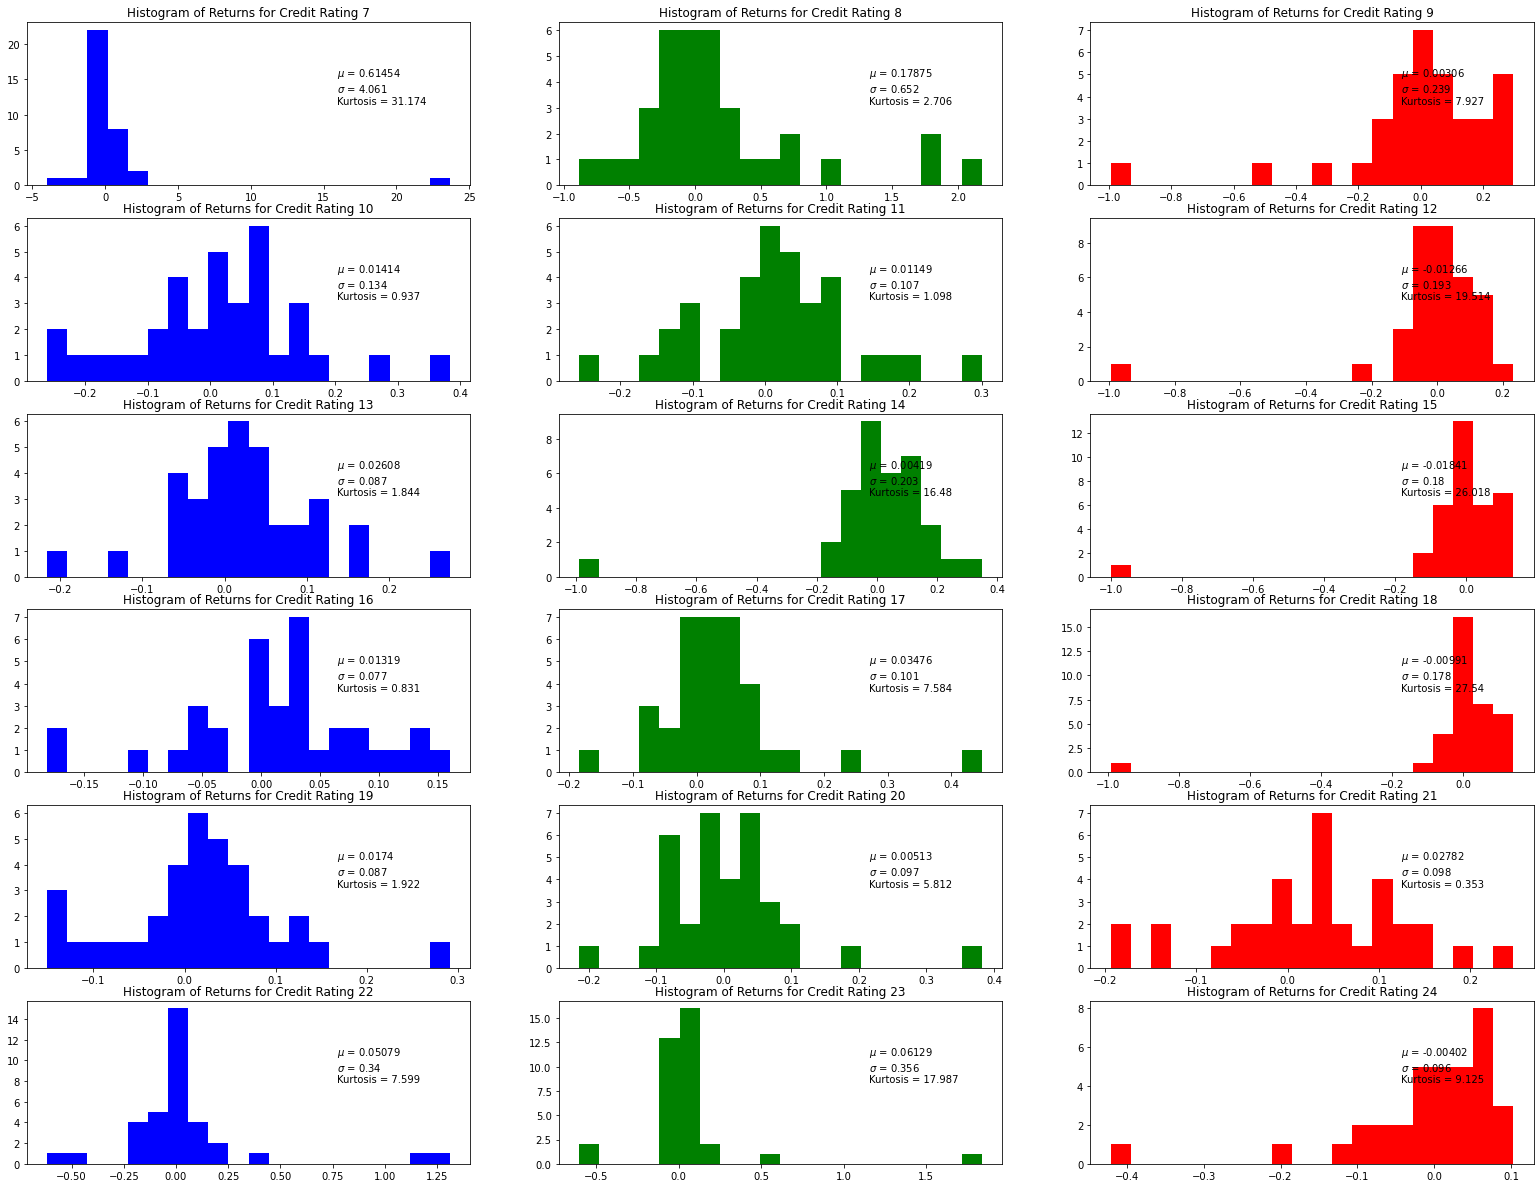

In [338]:
#plot 7:
fig, axs = plt.subplots(6, 3, figsize=(27,21))

j=7
colors = ['b', 'g', 'r']

for row in range(0,6):
    for col in range(0,3):
        axs[row][col].hist(x=ret_df[str(j) + '_index_ret'], bins=20, color=colors[col])
        axs[row][col].title.set_text('Histogram of Returns for Credit Rating ' + str(j))
        axs[row][col].annotate('$\mu$ = ' + str(round(np.mean(ret_df[str(j) + '_index_ret']),5)) + '\n$\sigma$ = ' +
                str(round(np.std(ret_df[str(j) + '_index_ret']),3)) +\
                           '\nKurtosis = ' + str(round(ret_df[str(j) + '_index_ret'].kurtosis(),3)), xy=(.7, .5), xycoords='axes fraction')
        j+=1
plt.savefig('RetDist.png', dpi=500)